# Prior Predictive Analysis for GARCH(1,1) Model

-  Step 1: Simulate hypothetical parameters iid via generated quantities block in Stan

- Step 2: Compute simulated data via the likelihood function (in Stan)

- Step 3: Compare simulated data with observed data to validate priors

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print("Current working directory: ", os.getcwd())

Current working directory:  c:\Users\nklatsky\econometrics\econometrics2024\project\code\garch


## Read in Real Data

In [3]:
# Define data path:
data_path = "../../data/DXY_approx_percent_returns.csv"
real_data = pd.read_csv(data_path, index_col=0)
real_data = real_data - np.mean(real_data)
real_data

,DXY
Date,
1994-04-01,-0.435009
1994-05-01,0.030122
1994-06-01,0.247245
1994-07-01,-0.768186
1994-10-01,0.362673
...,...
2024-03-21,-0.411072
2024-03-22,0.567956
2024-03-25,0.448986


## Read in Generated Data

In [4]:
# Read in generated data from prior predictive distribution(y_sim_samples)

garch_y_sim_path = "sampler_outputs/y_sim_samples.csv"
garch_y_sim = pd.read_csv(garch_y_sim_path)
garch_y_sim

,0,1,2,3,4,5,6,7,8,9,...,7792,7793,7794,7795,7796,7797,7798,7799,7800,7801
0,1.468010,1.320390,-0.865921,0.374977,-0.525048,1.666280,1.457900,0.727731,0.392824,0.553865,...,2.883780,-0.635557,-1.021130,-1.228600,0.027258,-0.259105,-1.708290,0.237096,1.392230,-1.763260
1,1.069460,-1.114210,-1.176030,-0.011935,0.084023,1.045990,-0.588459,-0.495885,0.494153,-0.584881,...,0.998771,-0.186573,-0.978041,0.411815,0.344282,-0.719133,0.033279,0.781432,0.719633,0.664362
2,-0.118499,-0.489522,-0.502311,-1.132470,0.020941,-0.671840,0.303040,-0.244502,0.207378,-0.038091,...,0.500635,-0.040329,0.365627,0.537228,0.844554,-2.051100,-1.227090,-0.748652,-1.064630,-0.259735
3,-1.064140,1.464630,0.032527,0.139487,0.179389,1.511820,0.321670,-0.258729,-0.441609,0.379637,...,0.694296,0.250720,0.386313,-0.061211,-0.972917,0.058097,-1.325320,0.492914,0.388163,0.135724
4,-0.736450,0.467425,0.746911,-0.453052,-0.580866,0.038389,0.314780,0.060601,-0.773049,-0.356470,...,-0.891656,-0.152368,0.599295,-0.570140,-0.930351,0.311302,0.533899,-0.062847,0.089263,0.270208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-0.009056,-0.207457,-0.274936,-0.516553,0.411252,0.419149,0.566903,-0.002657,-0.066158,-0.154869,...,-0.211968,0.415095,0.311686,-0.069970,0.422046,0.747918,0.607577,-1.003780,0.681142,-1.586100
3996,0.217111,0.870322,0.764270,-0.078896,-0.235396,-0.177808,-0.688224,0.429805,-0.402795,0.192398,...,0.285860,-0.106358,0.269724,-0.488280,-0.077789,0.116187,-0.686665,-0.416704,0.594285,-0.682924
3997,0.044869,-0.566844,-1.060590,-2.417520,0.784107,-0.099217,0.846561,0.263259,-1.091770,2.408580,...,-1.132850,1.379770,-0.447036,-0.699378,0.110386,1.040010,0.206144,0.070943,0.668394,1.307180
3998,-2.255540,3.348730,3.538930,3.399800,-1.380000,-2.189760,-0.299912,-0.576680,1.046900,0.636973,...,0.634858,1.522730,-0.101975,0.028830,0.141352,-0.902188,-1.596070,-1.304040,-1.177260,0.164450


In [5]:
# Read in the generated parameters to validate:

alpha1_sim_path = "sampler_outputs/alpha1_sim_samples.csv"
beta1_sim_path = "sampler_outputs/beta1_sim_samples.csv"
mu_sim_path = "sampler_outputs/mu_sim_samples.csv"
sigma_sim_path = "sampler_outputs/sigma_sim_samples.csv"

alpha1_sim = pd.read_csv(alpha1_sim_path)
beta1_sim = pd.read_csv(beta1_sim_path)
mu_sim = pd.read_csv(mu_sim_path)
sigma_sim = pd.read_csv(sigma_sim_path)




# Comparison

Real mean:  DXY    3.642875e-18
dtype: float64
Simulated mean:  -0.0036436364374263022


Real std:  DXY    0.483034
dtype: float64
Simulated std:  1.2137017871410911


Real min:  DXY   -3.057377
dtype: float64
Simulated min:  -5.65364


Real max:  DXY    2.51896
dtype: float64
Simulated max:  4.88334




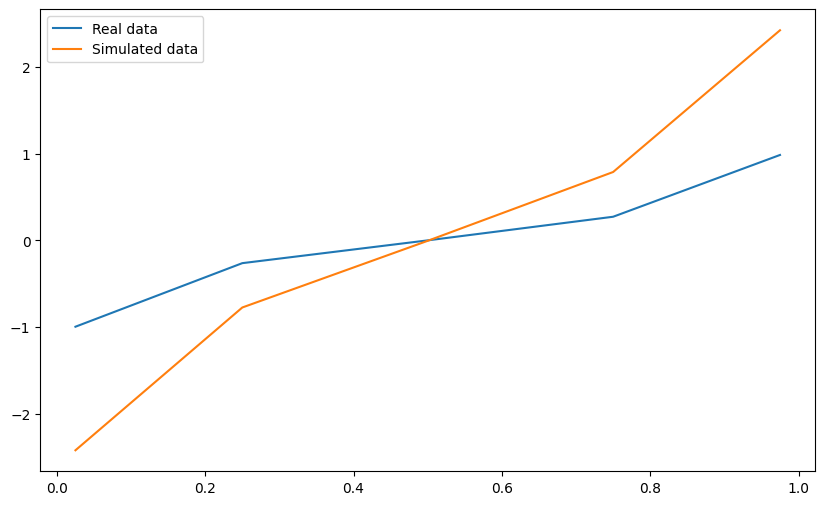

Real mean:  DXY    3.642875e-18
dtype: float64
Simulated mean:  0.003290276197128948


Real std:  DXY    0.483034
dtype: float64
Simulated std:  1.258847939586039


Real min:  DXY   -3.057377
dtype: float64
Simulated min:  -4.73691


Real max:  DXY    2.51896
dtype: float64
Simulated max:  5.05188




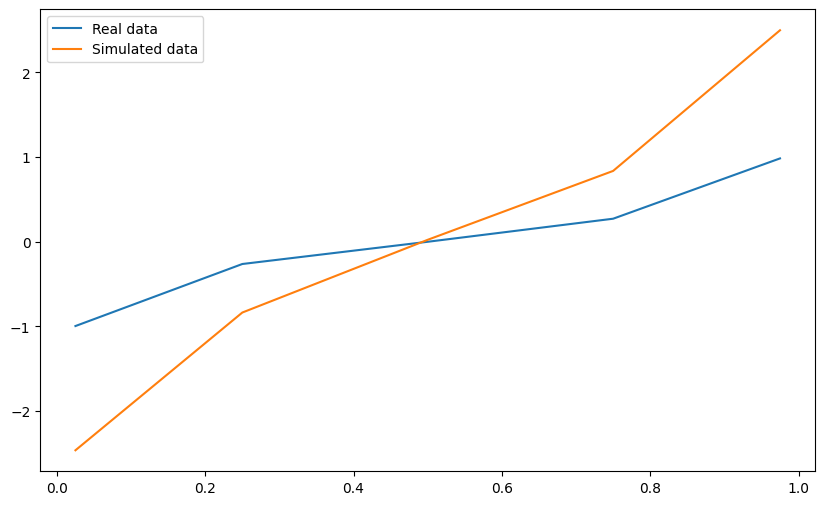

Real mean:  DXY    3.642875e-18
dtype: float64
Simulated mean:  0.009519734834914126


Real std:  DXY    0.483034
dtype: float64
Simulated std:  0.9023098290399906


Real min:  DXY   -3.057377
dtype: float64
Simulated min:  -7.4403


Real max:  DXY    2.51896
dtype: float64
Simulated max:  12.5069




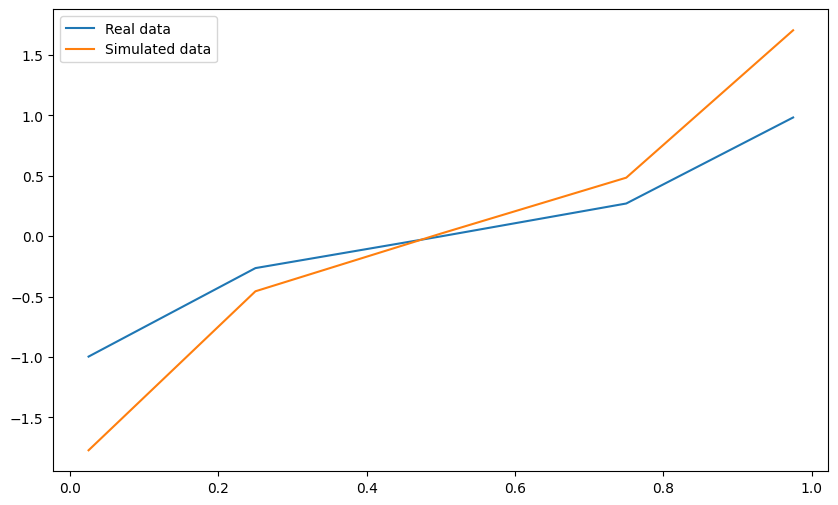

Real mean:  DXY    3.642875e-18
dtype: float64
Simulated mean:  -0.0011652284369264307


Real std:  DXY    0.483034
dtype: float64
Simulated std:  0.8505677883905808


Real min:  DXY   -3.057377
dtype: float64
Simulated min:  -6.29309


Real max:  DXY    2.51896
dtype: float64
Simulated max:  7.34274




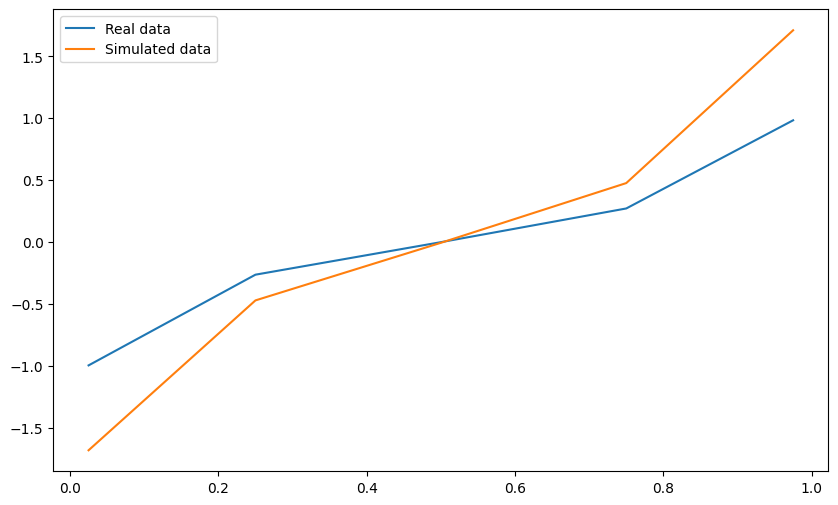

Real mean:  DXY    3.642875e-18
dtype: float64
Simulated mean:  0.01644033325972827


Real std:  DXY    0.483034
dtype: float64
Simulated std:  0.7978789601023973


Real min:  DXY   -3.057377
dtype: float64
Simulated min:  -7.79546


Real max:  DXY    2.51896
dtype: float64
Simulated max:  7.27597




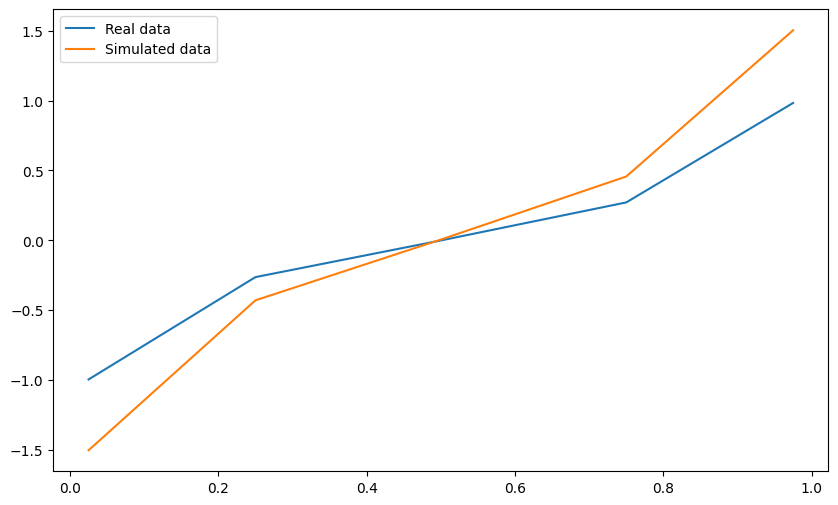

Real mean:  DXY    3.642875e-18
dtype: float64
Simulated mean:  -0.0037016803162009775


Real std:  DXY    0.483034
dtype: float64
Simulated std:  0.6842618270538476


Real min:  DXY   -3.057377
dtype: float64
Simulated min:  -4.75514


Real max:  DXY    2.51896
dtype: float64
Simulated max:  4.26141




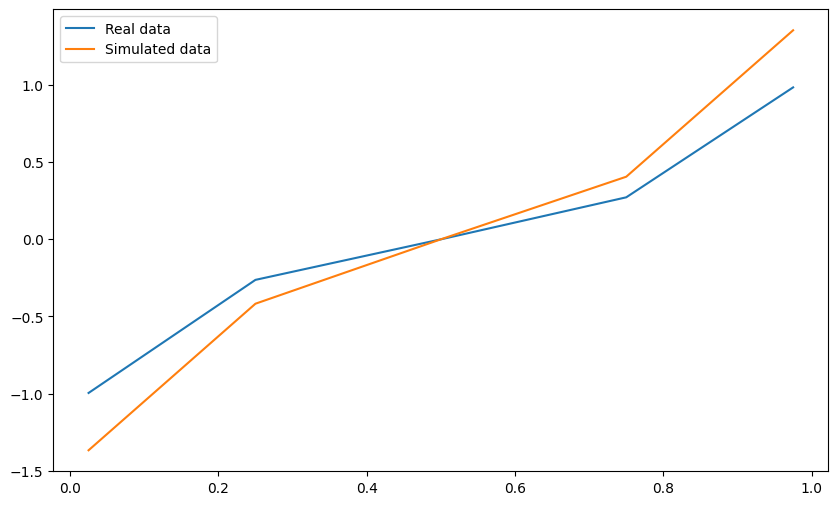

Real mean:  DXY    3.642875e-18
dtype: float64
Simulated mean:  0.012814377891489362


Real std:  DXY    0.483034
dtype: float64
Simulated std:  1.0480390613294828


Real min:  DXY   -3.057377
dtype: float64
Simulated min:  -5.47445


Real max:  DXY    2.51896
dtype: float64
Simulated max:  4.35943




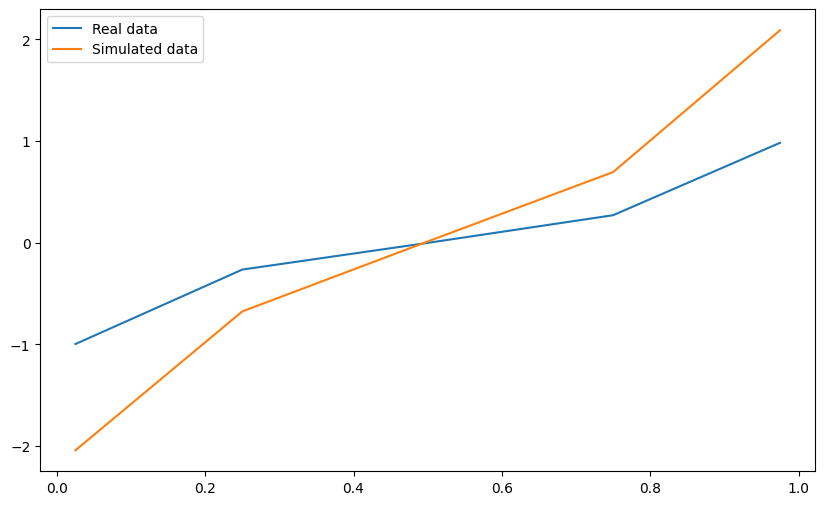

Real mean:  DXY    3.642875e-18
dtype: float64
Simulated mean:  0.00606781440762625


Real std:  DXY    0.483034
dtype: float64
Simulated std:  0.4063769230496209


Real min:  DXY   -3.057377
dtype: float64
Simulated min:  -1.74353


Real max:  DXY    2.51896
dtype: float64
Simulated max:  2.06104




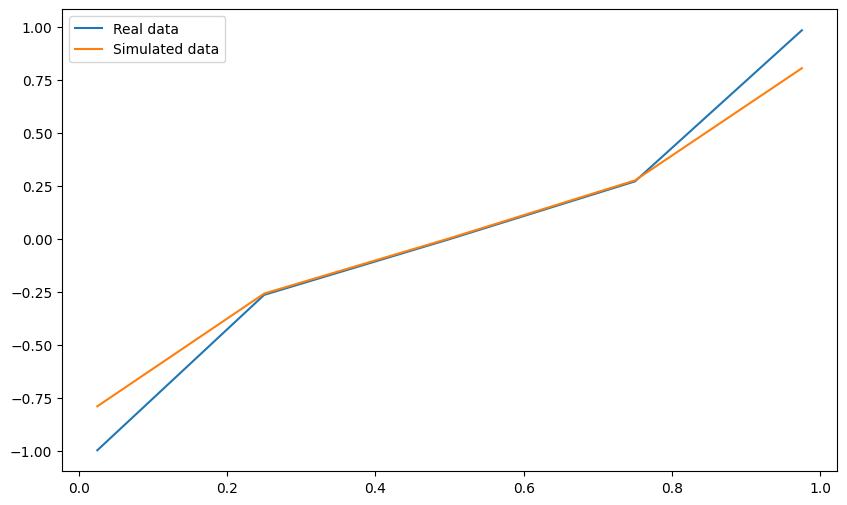

Real mean:  DXY    3.642875e-18
dtype: float64
Simulated mean:  -0.02991672192847988


Real std:  DXY    0.483034
dtype: float64
Simulated std:  2.1523362855248096


Real min:  DXY   -3.057377
dtype: float64
Simulated min:  -13.2182


Real max:  DXY    2.51896
dtype: float64
Simulated max:  19.7255




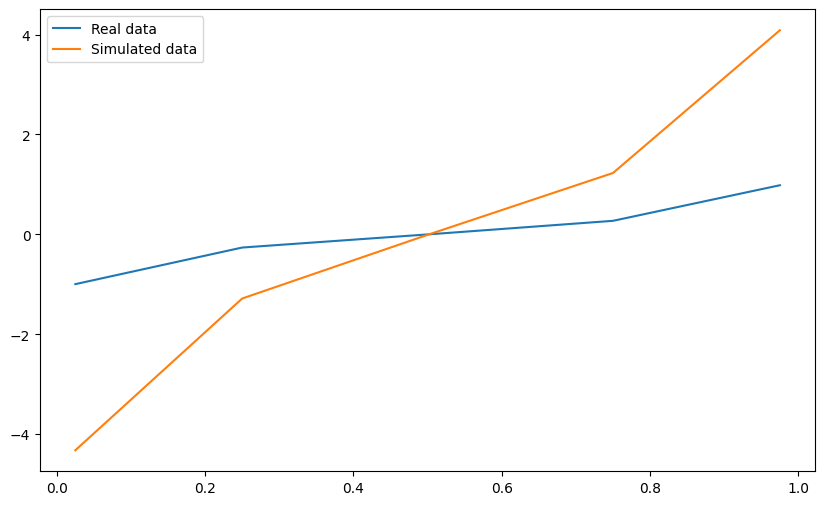

Real mean:  DXY    3.642875e-18
dtype: float64
Simulated mean:  -0.010408526002691619


Real std:  DXY    0.483034
dtype: float64
Simulated std:  0.9564641611756883


Real min:  DXY   -3.057377
dtype: float64
Simulated min:  -3.89443


Real max:  DXY    2.51896
dtype: float64
Simulated max:  3.94364




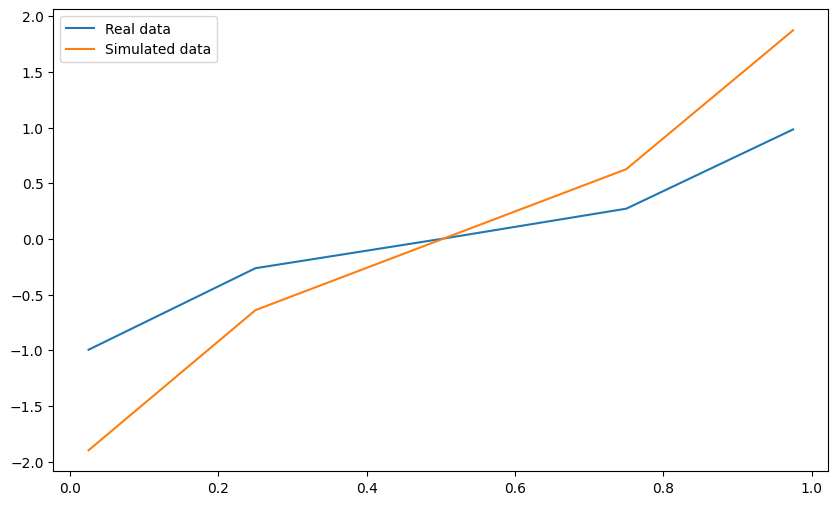

In [6]:
# Loop through rows in garch_y_sim (which each represent a simulated time series) and calculate the mean, stddev, and quantiles. Then compare to the real data.

real_mean = real_data.mean()
real_std = real_data.std()
real_quantiles = real_data.quantile([0.025, 0.25, 0.5, 0.75, 0.975])
real_min = real_data.min()
real_max = real_data.max()

simulated_means = []
simulated_stds = []
simulated_quantiles = []
simulated_mins = []
simulated_maxs = []

for row in range(garch_y_sim.shape[0]):
    sim_data = garch_y_sim.iloc[row]

    sim_mean = sim_data.mean()
    sim_std = sim_data.std()
    sim_quantiles = sim_data.quantile([0.025, 0.25, 0.5, 0.75, 0.975])
    sim_min = sim_data.min()
    sim_max = sim_data.max()

    simulated_means.append(sim_mean)
    simulated_stds.append(sim_std)
    simulated_quantiles.append(sim_quantiles)
    simulated_mins.append(sim_min)
    simulated_maxs.append(sim_max)

# Plot for comparison at select indices:
indices = [row for row in range(0, len(simulated_means), len(simulated_means)//10)]

for idx in indices:
    sim_mean = simulated_means[idx]
    sim_std = simulated_stds[idx]
    sim_quantiles = simulated_quantiles[idx]
    sim_min = simulated_mins[idx]
    sim_max = simulated_maxs[idx]


    print("Real mean: ", real_mean)
    print("Simulated mean: ", sim_mean)
    print("\n")

    print("Real std: ", real_std)
    print("Simulated std: ", sim_std)
    print("\n")

    print("Real min: ", real_min)
    print("Simulated min: ", sim_min)
    print("\n")

    print("Real max: ", real_max)
    print("Simulated max: ", sim_max)
    print("\n")

    # Plot quantiles
    plt.figure(figsize=(10, 6))
    plt.plot(real_quantiles, label="Real data quantiles")
    plt.plot(sim_quantiles, label="Simulated data quantiles")
    plt.legend()

    plt.show()




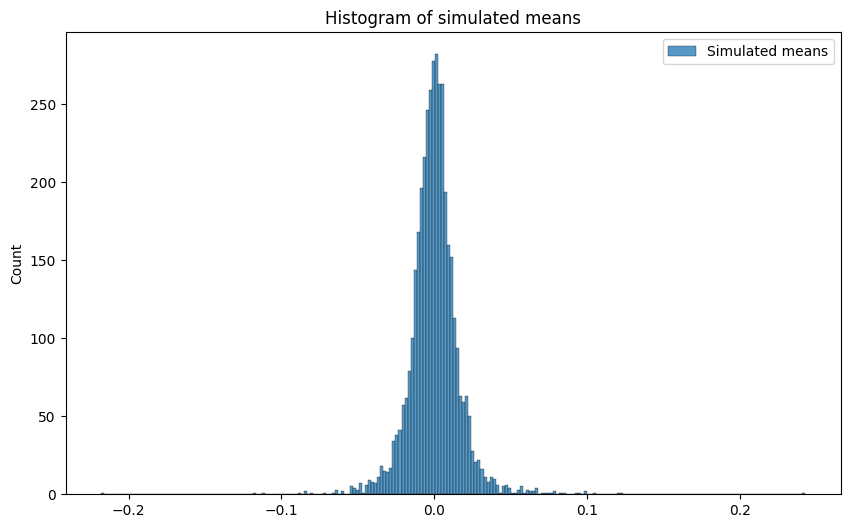

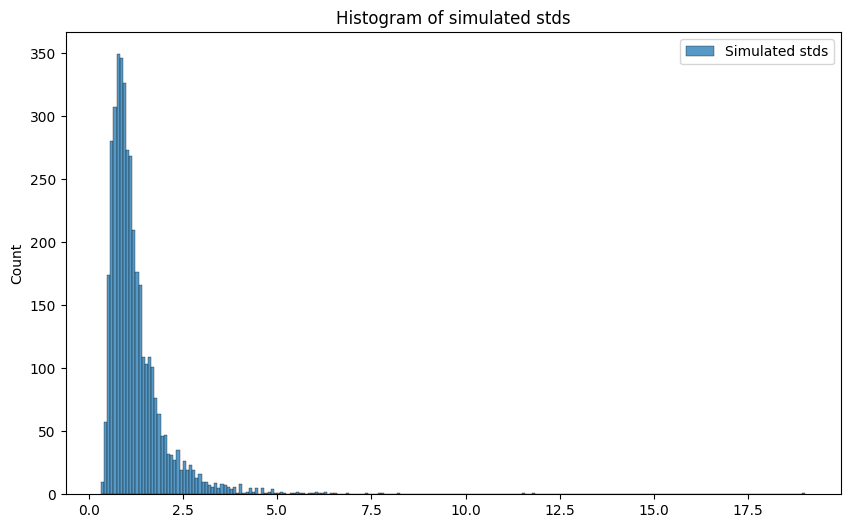

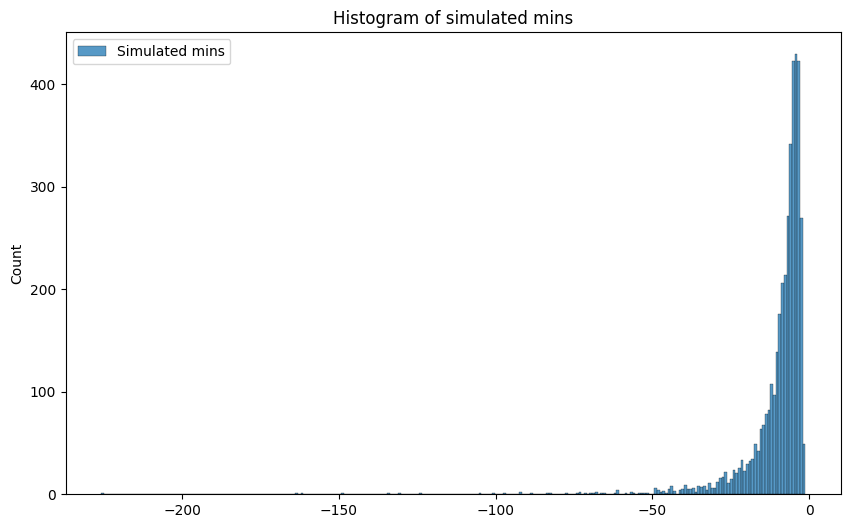

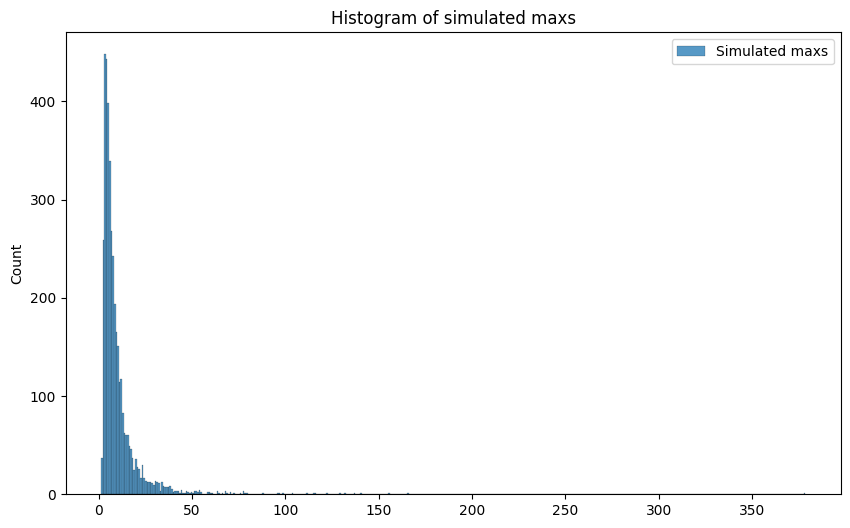

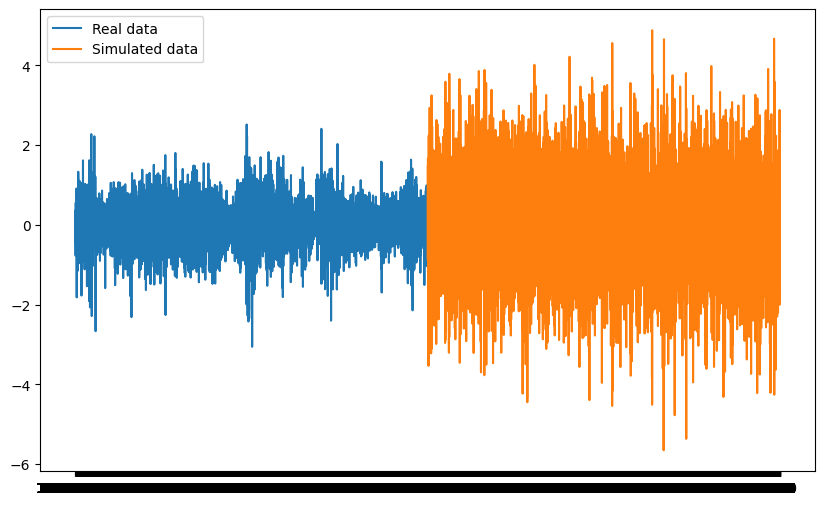

TypeError: only integer scalar arrays can be converted to a scalar index

In [11]:
# Plot histograms of the means and stds
plt.figure(figsize=(10, 6))
sns.histplot(simulated_means, label="Simulated means")
plt.title("Histogram of simulated means")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(simulated_stds, label="Simulated stds")
plt.title("Histogram of simulated stds")
plt.legend()
plt.show()

# Plot histograms of the mins and maxs
plt.figure(figsize=(10, 6))
sns.histplot(simulated_mins, label="Simulated mins")
plt.title("Histogram of simulated mins")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(simulated_maxs, label="Simulated maxs")
plt.title("Histogram of simulated maxs")
plt.legend()
plt.show()

# Plot the real data and simulated data for comparison
plt.figure(figsize=(10, 6))
plt.plot(real_data, label="Real data")
plt.plot(garch_y_sim.iloc[0], label="Simulated data")
plt.legend()
plt.show()





In [ ]:
# Create truncated histograms of the means and stds
# Convert to NumPy arrays if not already (assuming they might be lists or pandas Series)
simulated_means = np.array(simulated_means)
simulated_stds = np.array(simulated_stds)
simulated_mins = np.array(simulated_mins)
simulated_maxs = np.array(simulated_maxs)

# Calculate quantiles
q_low = 0.025
q_high = 0.975

low_quantile_means = np.quantile(simulated_means, q_low)
high_quantile_means = np.quantile(simulated_means, q_high)
truncated_simulated_means = simulated_means[(simulated_means > low_quantile_means) & (simulated_means < high_quantile_means)]

low_quantile_stds = np.quantile(simulated_stds, q_low)
high_quantile_stds = np.quantile(simulated_stds, q_high)
truncated_simulated_stds = simulated_stds[(simulated_stds > low_quantile_stds) & (simulated_stds < high_quantile_stds)]

low_quantile_mins = np.quantile(simulated_mins, q_low)
high_quantile_mins = np.quantile(simulated_mins, q_high)
truncated_simulated_mins = simulated_mins[(simulated_mins > low_quantile_mins) & (simulated_mins < high_quantile_mins)]

low_quantile_maxs = np.quantile(simulated_maxs, q_low)
high_quantile_maxs = np.quantile(simulated_maxs, q_high)
truncated_simulated_maxs = simulated_maxs[(simulated_maxs > low_quantile_maxs) & (simulated_maxs < high_quantile_maxs)]

# Plot histograms of the truncated means and stds
plt.figure(figsize=(10, 6))
sns.histplot(truncated_simulated_means, label="Truncated Simulated Means", bins=50)
plt.title("Histogram of Truncated Simulated Means")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(truncated_simulated_stds, label="Truncated Simulated STDs", bins=50)
plt.title("Histogram of Truncated Simulated STDs")
plt.legend()
plt.show()